In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [4]:
peng = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\pen-global-unsupervised-ad.csv',header = None)

In [5]:
peng

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47.0,100.0,27.0,81.0,57.0,37.0,26.0,0.0,0.0,23.0,56.0,53.0,100.0,90.0,40.0,98.0,n
1,0.0,89.0,27.0,100.0,42.0,75.0,29.0,45.0,15.0,15.0,37.0,0.0,69.0,2.0,100.0,6.0,o
2,0.0,57.0,31.0,68.0,72.0,90.0,100.0,100.0,76.0,75.0,50.0,51.0,28.0,25.0,16.0,0.0,o
3,0.0,100.0,7.0,92.0,5.0,68.0,19.0,45.0,86.0,34.0,100.0,45.0,74.0,23.0,67.0,0.0,o
4,0.0,67.0,49.0,83.0,100.0,100.0,81.0,80.0,60.0,60.0,40.0,40.0,33.0,20.0,47.0,0.0,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,57.0,89.0,0.0,100.0,1.0,68.0,43.0,34.0,30.0,0.0,1.0,31.0,41.0,65.0,100.0,86.0,n
805,20.0,77.0,61.0,100.0,100.0,80.0,48.0,46.0,9.0,7.0,68.0,0.0,25.0,39.0,0.0,82.0,n
806,84.0,90.0,0.0,91.0,51.0,56.0,98.0,19.0,36.0,0.0,43.0,40.0,100.0,75.0,62.0,100.0,n
807,42.0,99.0,55.0,61.0,71.0,24.0,18.0,0.0,0.0,30.0,64.0,61.0,100.0,94.0,9.0,100.0,n


In [7]:
shuffled_df = peng.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)


10


In [8]:
pca = PCA(n_components=10)
new_df = pca.fit_transform(df)
new_df
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7,8,9
0,2.973541,-1.264913,0.480311,-0.022611,0.132625,0.211317,0.094575,0.147713,0.229937,-0.267946
1,4.120341,0.573337,2.537978,-0.174712,-0.429598,-0.158832,0.251707,0.372754,-0.344154,-0.117287
2,-2.138387,-1.144269,0.493874,-1.330079,0.870030,0.144564,-1.368236,-0.688323,0.271364,0.679222
3,-1.681174,-0.713740,1.471938,0.935277,2.120561,-1.424596,-0.596113,0.490007,-0.700313,0.526891
4,-3.484812,1.208552,1.670307,-0.322360,-0.090346,-0.662038,0.015357,0.621533,-0.386923,0.211222
...,...,...,...,...,...,...,...,...,...,...
804,-2.015312,-2.004207,-1.237525,-0.271935,0.054860,-0.631831,-0.215836,-0.721127,0.048435,0.430971
805,0.095675,1.079231,0.170811,0.806388,3.953197,-0.522025,-0.683917,1.621001,0.698652,-0.711146
806,-3.628536,1.297193,1.209569,-0.563596,-0.993513,-0.915078,0.374090,0.362717,-0.249453,-0.559332
807,1.773326,-1.791729,0.998430,0.720980,-0.074058,1.314938,-0.071814,-0.283533,0.061216,-0.059595


In [9]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [10]:
lof = LOF()

cof = COF()

cblof = CBLOF(n_clusters=10)

knn = KNN()

lof.fit(df)

cof.fit(df)

knn.fit(df)

cblof.fit(df)

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=10, n_jobs=None, random_state=None,
   use_weights=False)

In [11]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,16
0,0
1,0
2,0
3,1
4,0
...,...
804,0
805,1
806,0
807,0


In [12]:
lof_pred = lof.labels_
lof_scores = lof.decision_scores_

knn_pred = knn.labels_
knn_scores = knn.decision_scores_

cblof_pred = cblof.labels_
cblof_scores = cblof.decision_scores_

cof_pred = cof.labels_
cof_scores = cof.decision_scores_

In [13]:
lof_accuracy = accuracy_score(y,lof_pred)
print(lof_accuracy)

0.8949320148331273


In [14]:
cblof_accuracy = accuracy_score(y,cblof_pred)
print(cblof_accuracy)

0.8875154511742892


In [15]:
cof_accuracy = accuracy_score(y,cof_pred)
print(cof_accuracy)

0.8702101359703337


In [16]:
knn_accuracy = accuracy_score(y,knn_pred)
print(knn_accuracy)

0.9394313967861557


F1-score: 0.50
ROC AUC: 0.85


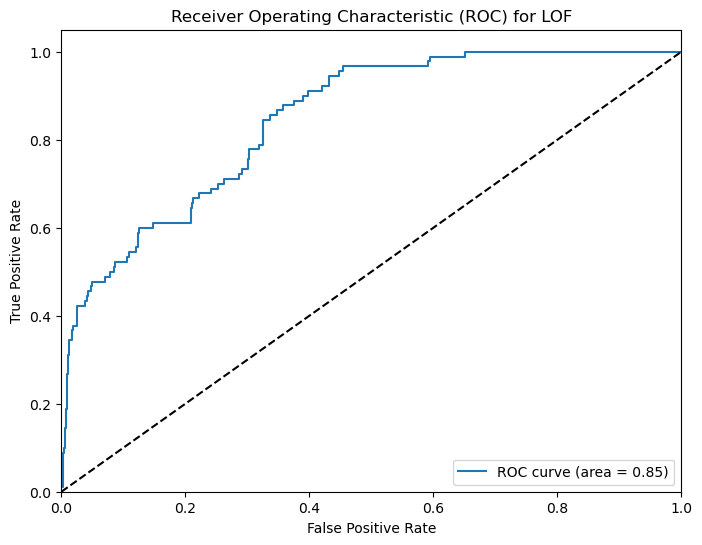

In [17]:
lof_f1 = f1_score(y, lof_pred)
print(f"F1-score: {lof_f1:.2f}")

roc_auc = roc_auc_score(y, lof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

lof_fpr, lof_tpr, _ = roc_curve(y, lof_scores)

plt.figure(figsize=(8, 6))
plt.plot(lof_fpr, lof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LOF')
plt.legend(loc="lower right")
plt.show()

0.8875154511742892
F1: 0.47
ROC AUC: 0.92


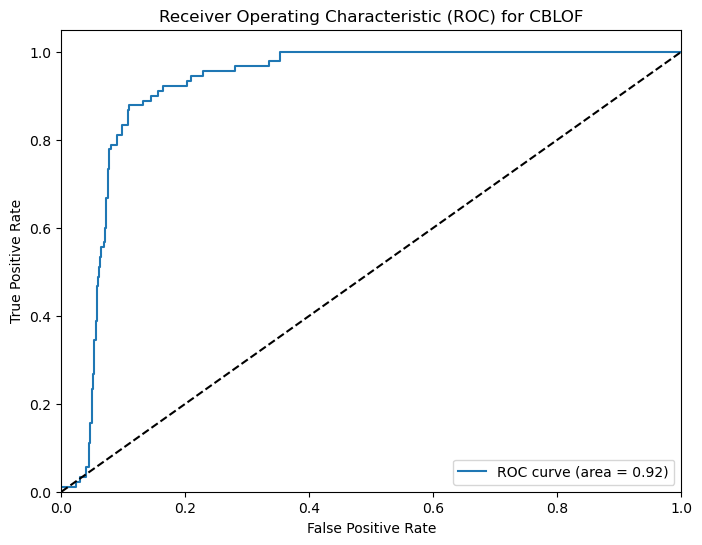

In [18]:
cblof_accuracy = accuracy_score(y,cblof_pred)
print(cblof_accuracy)

cblof_f1 = f1_score(y,cblof_pred)
print(f"F1: {cblof_f1:.2f}")

roc_auc = roc_auc_score(y, cblof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

cblof_fpr, cblof_tpr, _ = roc_curve(y, cblof_scores)

plt.figure(figsize=(8, 6))
plt.plot(cblof_fpr, cblof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for CBLOF')
plt.legend(loc="lower right")
plt.show()

0.9394313967861557
F1: 0.71
ROC AUC: 0.93


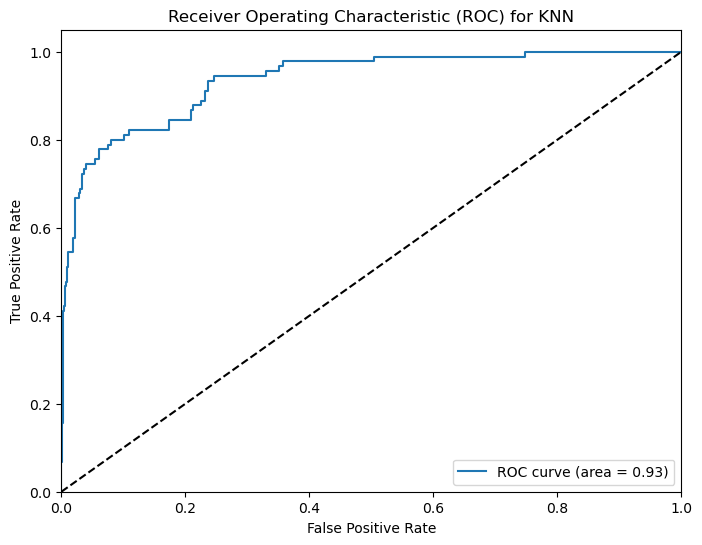

In [19]:
knn_accuracy = accuracy_score(y,knn_pred)
print(knn_accuracy)

knn_f1 = f1_score(y,knn_pred)
print(f"F1: {knn_f1:.2f}")

roc_auc = roc_auc_score(y, knn_scores)
print(f"ROC AUC: {roc_auc:.2f}")

knn_fpr, knn_tpr, _ = roc_curve(y, knn_scores)

plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for KNN')
plt.legend(loc="lower right")
plt.show()

0.8702101359703337
F1-score: 0.39
ROC AUC: 0.71


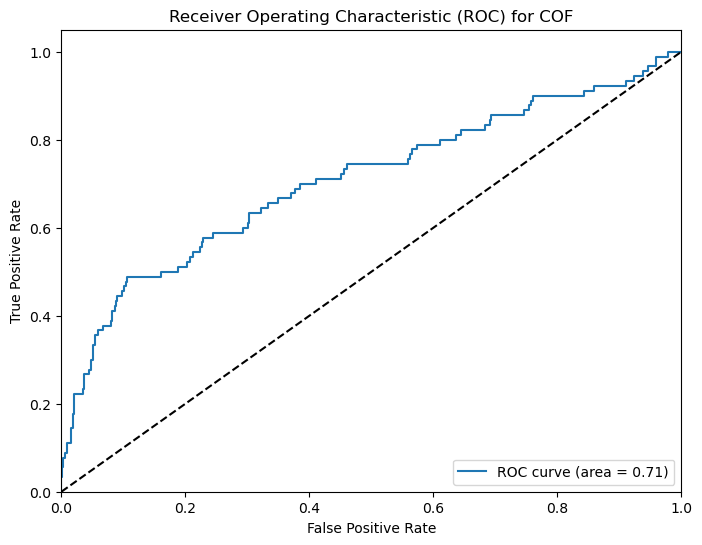

In [20]:
cof_accuracy = accuracy_score(y,cof_pred)
print(cof_accuracy)

cof_f1 = f1_score(y, cof_pred)
print(f"F1-score: {cof_f1:.2f}")

roc_auc = roc_auc_score(y, cof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

cof_fpr, cof_tpr, _ = roc_curve(y, cof_scores)

plt.figure(figsize=(8, 6))
plt.plot(cof_fpr, cof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for COF')
plt.legend(loc="lower right")
plt.show()

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score


c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

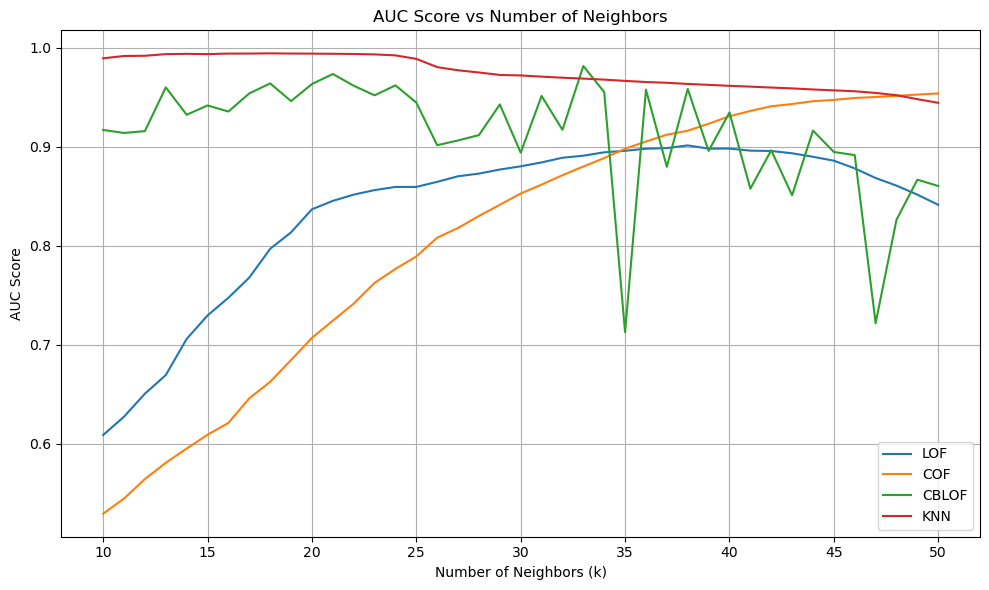

In [23]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []

precision_scores_lof = []
recall_scores_lof = []
f1_scores_lof = []


precision_scores_cblof = []
recall_scores_cblof = []
f1_scores_cblof = []

precision_scores_knn = []
recall_scores_knn = []
f1_scores_knn = []

precision_scores_cof = []
recall_scores_cof = []
f1_scores_cof = []

n_neighbors_list = list(range(10, 51))

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    y_pred_lof = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)
    auc_scores_lof.append(auc_lof)
    precision_lof = precision_score(y, y_pred_lof)
    recall_lof = recall_score(y, y_pred_lof)
    f1_lof = f1_score(y, y_pred_lof)
    precision_scores_lof.append(precision_lof)
    recall_scores_lof.append(recall_lof)
    f1_scores_lof.append(f1_lof)

    cof_model = COF(n_neighbors=n_neighbors)
    cof_model.fit(df)
    y_scores_cof = cof_model.decision_function(df)
    y_pred_cof = cof_model.labels_
    auc_cof = roc_auc_score(y, y_scores_cof)
    auc_scores_cof.append(auc_cof)
    precision_cof = precision_score(y, y_pred_cof)
    recall_cof = recall_score(y, y_pred_cof)
    f1_cof = f1_score(y, y_pred_cof)
    precision_scores_cof.append(precision_cof)
    recall_scores_cof.append(recall_cof)
    f1_scores_cof.append(f1_cof)

    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    y_scores_cblof = cblof_model.decision_function(df)
    y_pred_cblof = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)
    auc_scores_cblof.append(auc_cblof)
    precision_cblof = precision_score(y, y_pred_cblof)
    recall_cblof = recall_score(y, y_pred_cblof)
    f1_cblof = f1_score(y, y_pred_cblof)
    precision_scores_cblof.append(precision_cblof)
    recall_scores_cblof.append(recall_cblof)
    f1_scores_cblof.append(f1_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    y_pred_knn = knn_model.labels_
    precision_knn = precision_score(y, y_pred_knn)
    recall_knn = recall_score(y, y_pred_knn)
    f1_knn = f1_score(y, y_pred_knn)
    precision_scores_knn.append(precision_knn)
    recall_scores_knn.append(recall_knn)
    f1_scores_knn.append(f1_knn)
    auc_knn = roc_auc_score(y, y_scores_knn)
    auc_scores_knn.append(auc_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
mean_auc_cof = np.mean(auc_scores_cof)
mean_precision_lof = np.mean(precision_scores_lof)
mean_recall_lof = np.mean(recall_scores_lof)
mean_f1_lof = np.mean(f1_scores_lof)
mean_precision_cblof = np.mean(precision_scores_cblof)
mean_recall_cblof = np.mean(recall_scores_cblof)
mean_f1_cblof = np.mean(f1_scores_cblof)
mean_precision_knn = np.mean(precision_scores_knn)
mean_recall_knn = np.mean(recall_scores_knn)
mean_f1_knn = np.mean(f1_scores_knn)
mean_precision_cof = np.mean(precision_scores_cof)
mean_recall_cof = np.mean(recall_scores_cof)
mean_f1_cof = np.mean(f1_scores_cof)
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

plt.plot(n_neighbors_list, auc_scores_cof, label='COF')
# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:


print(f"Mean Precision for LOF: {mean_precision_lof:.4f}")
print(f"Mean Recall for LOF: {mean_recall_lof:.4f}")
print(f"Mean F1 Score for LOF: {mean_f1_lof:.4f}")

print(f"Mean Precision for CBLOF: {mean_precision_cblof:.4f}")
print(f"Mean Recall for CBLOF: {mean_recall_cblof:.4f}")
print(f"Mean F1 Score for CBLOF: {mean_f1_cblof:.4f}")

print(f"Mean Precision for KNN: {mean_precision_knn:.4f}")
print(f"Mean Recall for KNN: {mean_recall_knn:.4f}")
print(f"Mean F1 Score for KNN: {mean_f1_knn:.4f}")

print(f"Mean Precision for COF: {mean_precision_cof:.4f}")
print(f"Mean Recall for COF: {mean_recall_cof:.4f}")
print(f"Mean F1 Score for COF: {mean_f1_cof:.4f}")

Mean Precision for LOF: 0.5387
Mean Recall for LOF: 0.4848
Mean F1 Score for LOF: 0.5103
Mean Precision for CBLOF: 0.7522
Mean Recall for CBLOF: 0.6770
Mean F1 Score for CBLOF: 0.7126
Mean Precision for KNN: 0.7488
Mean Recall for KNN: 0.6737
Mean F1 Score for KNN: 0.7093
Mean Precision for COF: 0.5035
Mean Recall for COF: 0.4531
Mean F1 Score for COF: 0.4770


In [27]:
from emmv import emmv_scores

lof_emmv = emmv_scores(lof,df)
print('lof emmv',lof_emmv['em'])

cblof_emmv = emmv_scores(cblof,df)
print('cblof emmv',cblof_emmv['em'])

knn_emmv = emmv_scores(knn,df)
print('knn emmv',knn_emmv['em'])

cof_emmv = emmv_scores(cof,df)
print('cof emmv',cof_emmv['em'])


lof emmv 0.005037762669962917
cblof emmv 0.005037762669962917
knn emmv 0.005037762669962917
cof emmv 0.08557457425723114


In [28]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
print("COF auc",mean_auc_cof)


KNN auc 0.9752241708787046
LOF auc 0.8367892774894369
CBLOF auc 0.9129146548767297
COF auc 0.8086392950160378
